In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Act Math encoded, label proficient score

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
filename4 = os.path.join(os.getcwd(),"dataframes", "actMath_11_encoded_df.csv")
actMath_11_encoded_df = pd.read_csv(filename4, header = 0)


In [12]:
actMath_11_encoded_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,category_MATHEMATICS,category_ENGLISH,category_SCIENCE,category_SOCIAL_STUDIES,category_FOREIGN_LANGUAGE,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False


In [13]:
actMath_11_encoded_df.dtypes

studentId                        int64
is_proficient                     bool
proficient_score               float64
school_High School A              bool
school_High School B              bool
school_High School C              bool
school_High School D              bool
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS          bool
category_VISUAL_ARTS              bool
category_TECHNOLOGY               bool
category_BUSINESS                 bool
category_TRADES                   bool
category_AGRICULTURE              bool
category_PHYSICAL_EDUCATION       bool
category_HEALTH                   bool
category_CAREER_PREP              bool
category_MILITARY_SCIENCE         bool
dtype: object

In [14]:
#changing every bool into intsa
actMath_11_encoded_df[actMath_11_encoded_df.select_dtypes(include=['bool']).columns] = actMath_11_encoded_df.select_dtypes(include=['bool']).astype(int)
print(actMath_11_encoded_df.dtypes)

studentId                        int64
is_proficient                    int32
proficient_score               float64
school_High School A             int32
school_High School B             int32
school_High School C             int32
school_High School D             int32
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS         int32
category_VISUAL_ARTS             int32
category_TECHNOLOGY              int32
category_BUSINESS                int32
category_TRADES                  int32
category_AGRICULTURE             int32
category_PHYSICAL_EDUCATION      int32
category_HEALTH                  int32
category_CAREER_PREP             int32
category_MILITARY_SCIENCE        int32
dtype: object


In [15]:
y = actMath_11_encoded_df['proficient_score']
X= actMath_11_encoded_df.drop(['proficient_score', 'studentId', 'is_proficient'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify = actMath_11_encoded_df['is_proficient'],random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 2580
(1935, 22)
(645, 22)


In [16]:
X.columns

Index(['school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [ ]:
#possible hyperparameters
max_depth_values= [8,12,25,32]
min_samples_leaf_values = [4,5,8,10]
param_grid = {'max_depth' : list(max_depth_values), 'min_samples_leaf' : list(min_samples_leaf_values)}


#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressorRead = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid = GridSearchCV(dt_regressorRead, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print("Done")
dt_best_paramsRead = dt_grid_search.best_params_

dt_best_paramsRead
#{'max_depth': 12, 'min_samples_leaf': 10}

Running Grid Search
Done


{'max_depth': 12, 'min_samples_leaf': 10}

In [18]:
dt_model = DecisionTreeRegressor(max_depth=12, min_samples_leaf=10)
dt_model.fit(X_train,y_train)

#testing model on the X_test
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test,y_dt_pred,squared=False)
dt_r2 = r2_score(y_test,y_dt_pred)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_bool = y_dt_pred >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.95      0.84       411
        True       0.83      0.44      0.58       234

    accuracy                           0.77       645
   macro avg       0.79      0.70      0.71       645
weighted avg       0.78      0.77      0.74       645

[DT] Root Mean Squared Error: 0.2033324461738545
[DT] R2: 0.22395083627777657


In [19]:
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)


Micro F1 Score: 0.7658914728682171


Confusion Matrix:
[[390  21]
 [130 104]]


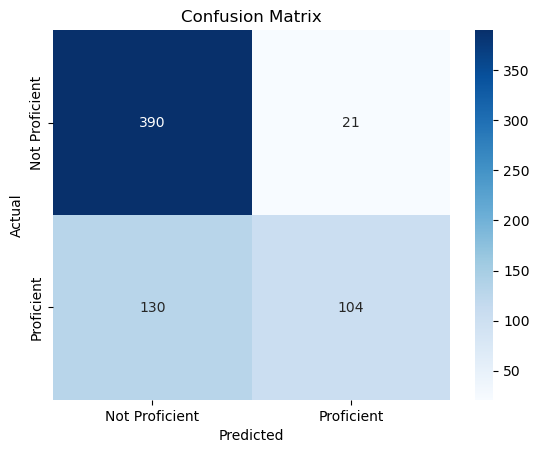

In [20]:
cm = confusion_matrix(y_test_bool, y_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [21]:
importances = dt_model.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                        Feature  Importance
8              category_ENGLISH    0.518861
9              category_SCIENCE    0.169011
10      category_SOCIAL_STUDIES    0.058471
2          school_High School C    0.055545
11    category_FOREIGN_LANGUAGE    0.031997
18  category_PHYSICAL_EDUCATION    0.030535
7          category_MATHEMATICS    0.029829
17         category_AGRICULTURE    0.025789
13         category_VISUAL_ARTS    0.013200
16              category_TRADES    0.010887
20         category_CAREER_PREP    0.008501
0          school_High School A    0.008402
12     category_PERFORMING_ARTS    0.008224
1          school_High School B    0.005995
21    category_MILITARY_SCIENCE    0.005838
4                   iready_math    0.005306
19              category_HEALTH    0.004596
3          school_High School D    0.004443
14          category_TECHNOLOGY    0.003790
5                iready_reading    0.000779
15            category_BUSINESS    0.000000
6                  bbb_literacy 